In [1]:
import pandas as pd
df = pd.read_csv('sales.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [2]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [3]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
cat_cols = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_cols.append(x)
cat_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [6]:
cat_cols.remove('Item_Identifier')
cat_cols.remove('Outlet_Identifier')
cat_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [7]:
for col in cat_cols:
    print(col, len(df[col].unique()))

Item_Fat_Content 5
Item_Type 16
Outlet_Size 4
Outlet_Location_Type 3
Outlet_Type 4


In [8]:
for col in cat_cols:
    print(df[col].value_counts())
    print('*'*30)

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
******************************
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
******************************
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64
******************************
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64
******************************
Outlet_Type
Supermarket Type1    5577
Grocery Store        108

In [9]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
identifier_weight = df.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')
identifier_weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [11]:
miss_bool = df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [12]:
df['Item_Identifier']

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [13]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in identifier_weight.index:
            df['Item_Weight'][i] = identifier_weight.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])

In [14]:
df.groupby('Outlet_Size').agg({'Outlet_Size': np.size})

,Outlet_Size
Outlet_Size,
High,932
Medium,2793
Small,2388


In [15]:
outlet_size_null= df[df['Outlet_Size'].isna()]
outlet_size_null

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [16]:
null_counts = outlet_size_null['Outlet_Type'].value_counts()
null_counts

Outlet_Type
Supermarket Type1    1855
Grocery Store         555
Name: count, dtype: int64

In [17]:
df['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [18]:
type_size = df.groupby(['Outlet_Type','Outlet_Size'] ).agg({'Outlet_Type':[np.size]})
type_size

Outlet_Type
                                     size
Outlet_Type       Outlet_Size            
Grocery Store     Small               528
Supermarket Type1 High                932
                  Medium              930
                  Small              1860
Supermarket Type2 Medium              928
Supermarket Type3 Medium              935

In [19]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
display (outlet_size_mode)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [20]:
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [21]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
sum(df['Item_Visibility']==0)

526

In [23]:
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)

In [24]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [25]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [26]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df.drop(columns = 'Item_Identifier', inplace = True)
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [27]:
df['New_Item_Type'].value_counts()

New_Item_Type
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [28]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

New_Item_Type
Food              6125
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64

In [29]:
df.groupby (['New_Item_Type','Item_Fat_Content'] ).agg({'Outlet_Type':[np.size]})

Outlet_Type
                                       size
New_Item_Type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Low Fat                 1599

In [30]:
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64

In [31]:
df.groupby (['New_Item_Type','Item_Fat_Content'] ).agg({'Outlet_Type':[np.size]})

Outlet_Type
                                       size
New_Item_Type  Item_Fat_Content            
Drinks         Low Fat                  728
               Regular                   71
Food           Low Fat                 3190
               Regular                 2935
Non-Consumable Non-Edible              1599

In [32]:
df['Outlet_Years'] = 2024 - df['Outlet_Establishment_Year']
df.drop(columns = 'Outlet_Establishment_Year', inplace = True)
df['Outlet_Years']

0       25
1       15
2       25
3       26
4       37
        ..
8518    37
8519    22
8520    20
8521    15
8522    27
Name: Outlet_Years, Length: 8523, dtype: int64

In [33]:
X = df.drop(columns = 'Item_Outlet_Sales')
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,Food,25
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,Drinks,15
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,Food,25
3,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,Food,26
4,8.930,Non-Edible,0.066132,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,Non-Consumable,37
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,Food,37
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,Small,Tier 2,Supermarket Type1,Food,22
8520,10.600,Non-Edible,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,Non-Consumable,20
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,Food,15


In [34]:
Y = df['Item_Outlet_Sales']
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

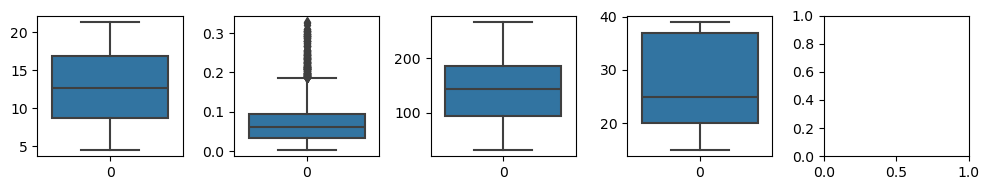

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (10, 2))
ax = ax.flatten()
col = X.select_dtypes(include='number').columns
index = 0
for i in range(len(col)):
    sns.boxplot(data = X[col[index]], ax = ax[i])
    index += 1
plt.tight_layout()
plt.show()

In [36]:
for col in X.select_dtypes(include='number').columns:
    lower_bound = np.percentile(X[col], 5)
    upper_bound = np.percentile(X[col], 95)
    X[col] = X[col].clip(lower=lower_bound, upper=upper_bound)
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,Food,25
1,5.940,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,Drinks,15
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,Food,25
3,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,Food,26
4,8.930,Non-Edible,0.066132,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,Non-Consumable,37
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,Food,37
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,Small,Tier 2,Supermarket Type1,Food,22
8520,10.600,Non-Edible,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,Non-Consumable,20
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,Food,15


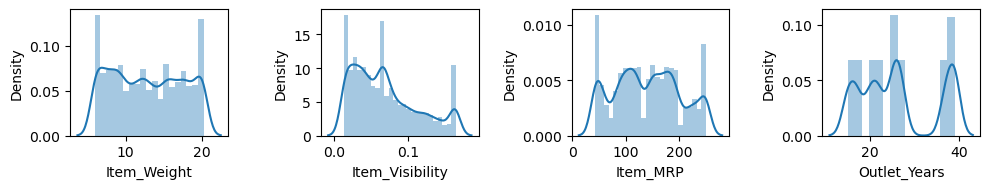

In [37]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (10,2))
ax = ax.flatten()
cols = X.select_dtypes(include='number').columns
index = 0
for i in range(len(cols)):
    sns.distplot(a = X[cols[index]], ax = ax[i])
    index += 1
plt.tight_layout()
plt.show()

In [38]:
skewness = X[cols].skew()
skewness

Item_Weight        0.073813
Item_Visibility    0.727390
Item_MRP           0.105605
Outlet_Years       0.396641
dtype: float64

In [39]:
for col in X.select_dtypes(include = 'number').columns:
    if skewness[col] > 1:
        X[col] = np.sqrt(X[col] + 1)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[cols] = scaler.fit_transform(X[cols])
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years
0,-0.783036,Low Fat,-1.212931,Dairy,1.782295,OUT049,Medium,Tier 1,Supermarket Type1,Food,-0.139541
1,-1.518190,Regular,-1.138387,Soft Drinks,-1.513887,OUT018,Medium,Tier 3,Supermarket Type2,Drinks,-1.334103
2,1.011088,Low Fat,-1.196486,Meat,0.012830,OUT049,Medium,Tier 1,Supermarket Type1,Food,-0.139541
3,1.383040,Regular,-0.057374,Fruits and Vegetables,0.674831,OUT010,Small,Tier 3,Grocery Store,Food,-0.020085
4,-0.863991,Non-Edible,-0.057374,Household,-1.422427,OUT013,High,Tier 3,Supermarket Type1,Non-Consumable,1.293934
...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.315804,Low Fat,-0.273066,Snack Foods,1.205170,OUT013,High,Tier 3,Supermarket Type1,Food,1.293934
8519,-0.984328,Regular,-0.499194,Baking Goods,-0.534424,OUT045,Small,Tier 2,Supermarket Type1,Food,-0.497909
8520,-0.498602,Non-Edible,-0.771356,Health and Hygiene,-0.911154,OUT035,Small,Tier 2,Supermarket Type1,Non-Consumable,-0.736822
8521,-1.240319,Regular,1.767363,Snack Foods,-0.616588,OUT018,Medium,Tier 3,Supermarket Type2,Food,-1.334103


In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Outlet'] = le.fit_transform(X['Outlet_Identifier'])
X.drop(columns = 'Outlet_Identifier', inplace = True)
X['Outlet']

0       9
1       3
2       9
3       0
4       1
       ..
8518    1
8519    7
8520    6
8521    3
8522    8
Name: Outlet, Length: 8523, dtype: int32

In [42]:
cat_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [43]:
for col in cat_cols:
    X[col] = le.fit_transform(X[col])
X 

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years,Outlet
0,-0.783036,0,-1.212931,4,1.782295,1,0,1,Food,-0.139541,9
1,-1.518190,2,-1.138387,14,-1.513887,1,2,2,Drinks,-1.334103,3
2,1.011088,0,-1.196486,10,0.012830,1,0,1,Food,-0.139541,9
3,1.383040,2,-0.057374,6,0.674831,2,2,0,Food,-0.020085,0
4,-0.863991,1,-0.057374,9,-1.422427,0,2,1,Non-Consumable,1.293934,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.315804,0,-0.273066,13,1.205170,0,2,1,Food,1.293934,1
8519,-0.984328,2,-0.499194,0,-0.534424,2,1,1,Food,-0.497909,7
8520,-0.498602,1,-0.771356,8,-0.911154,2,1,1,Non-Consumable,-0.736822,6
8521,-1.240319,2,1.767363,13,-0.616588,1,2,2,Food,-1.334103,3


In [44]:
X = pd.get_dummies(X, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'],dtype = int )
X

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,-0.783036,-1.212931,4,1.782295,-0.139541,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,-1.518190,-1.138387,14,-1.513887,-1.334103,3,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,1.011088,-1.196486,10,0.012830,-0.139541,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,1.383040,-0.057374,6,0.674831,-0.020085,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,-0.863991,-0.057374,9,-1.422427,1.293934,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.315804,-0.273066,13,1.205170,1.293934,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
8519,-0.984328,-0.499194,0,-0.534424,-0.497909,7,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
8520,-0.498602,-0.771356,8,-0.911154,-0.736822,6,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
8521,-1.240319,1.767363,13,-0.616588,-1.334103,3,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def train(model, X, Y):
    print ("Train Test Split")
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
    print (X.shape, Y.shape)
    print (X_train.shape, X_test.shape ,  Y_train.shape, Y_test.shape)
    
    model.fit(X_train, Y_train)       
   
    cv_score = cross_val_score(model, X, Y, scoring='neg_mean_squared_error', cv=5)
    print("Model Report")
    print ('Scoring - neg_mean_squared_error')
    print ( cv_score )    
    cv_score = np.abs(np.mean(cv_score))    
    print ('ABS Average of - neg_mean_squared_error',cv_score )       
    cv_score = cross_val_score(model, X, Y,  cv=5)
    print ()
    print ('R2 Score ')
    print ( cv_score )    
    cv_score = np.mean(cv_score)     
    print ('Average R2 Score ',cv_score)    
    print ()
    
    print ('Accuracy')
    print ('Accuracy of Test data')
    Y_test_pred = model.predict(X_test)
    print('R2_Score:', r2_score(Y_test,Y_test_pred))
    print ('Accuracy of Training data')
    Y_train_pred = model.predict(X_train)
    print('R2_Score:', r2_score(Y_train,Y_train_pred))
    print ('Accuracy of Complete data')
    Y_pred = model.predict(X)
    print('R2_Score:', r2_score(Y, Y_pred))
    print ()

    print ('Display actual and predicted values')
    sns.regplot(x =Y, y= Y_pred, scatter_kws={"color": "b"}, line_kws={"color": "r"})
    plt.show()

Train Test Split
(8523, 22) (8523,)
(5966, 22) (2557, 22) (5966,) (2557,)
Model Report
Scoring - neg_mean_squared_error
[-1379879.03433602 -1413440.91397607 -1435467.5418723  -1324854.30799467
 -1394398.24119692]
ABS Average of - neg_mean_squared_error 1389608.0078751962

R2 Score 
[0.55284623 0.499002   0.47961553 0.54146035 0.52744358]
Average R2 Score  0.5200735375212977

Accuracy
Accuracy of Test data
R2_Score: 0.5305237299688206
Accuracy of Training data
R2_Score: 0.9999999914674174
Accuracy of Complete data
R2_Score: 0.8527044929370249

Display actual and predicted values


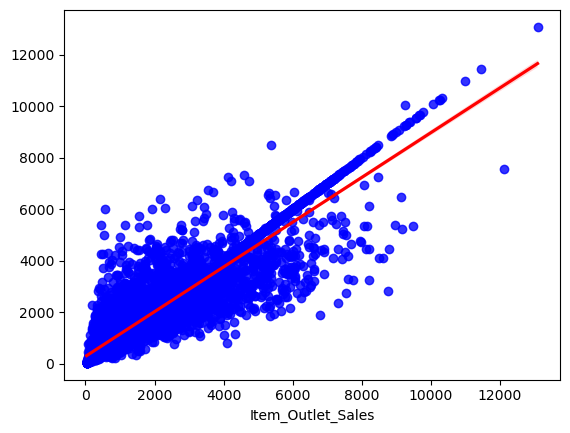

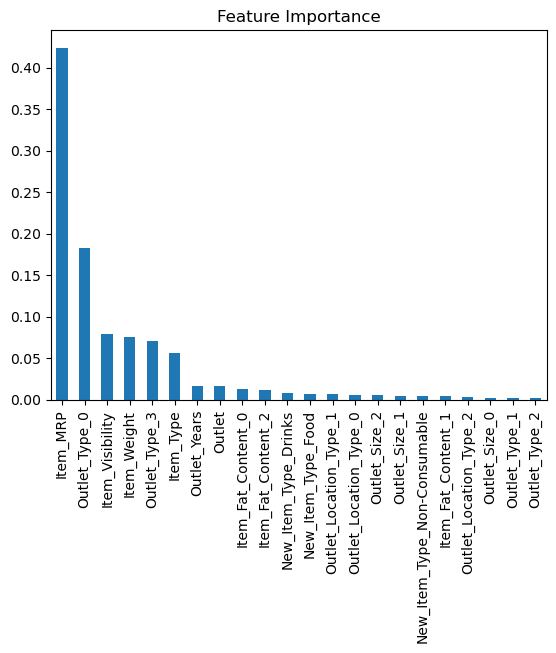

In [46]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X,Y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

Train Test Split
(8523, 22) (8523,)
(5966, 22) (2557, 22) (5966,) (2557,)
Model Report
Scoring - neg_mean_squared_error
[-1532006.21825081 -1517563.76521946 -1453938.40667949 -1404132.31739291
 -1456953.93083899]
ABS Average of - neg_mean_squared_error 1472918.927676329

R2 Score 
[0.50397394 0.46057366 0.46883895 0.5199976  0.51292471]
Average R2 Score  0.49326177282167655

Accuracy
Accuracy of Test data
R2_Score: 0.5078238987199473
Accuracy of Training data
R2_Score: 0.8999301438431331
Accuracy of Complete data
R2_Score: 0.7769243412233986

Display actual and predicted values


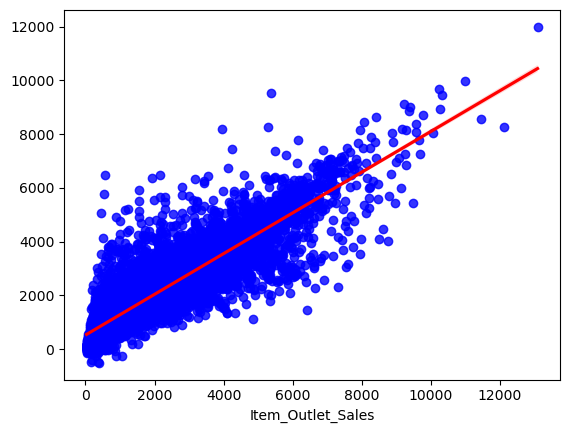

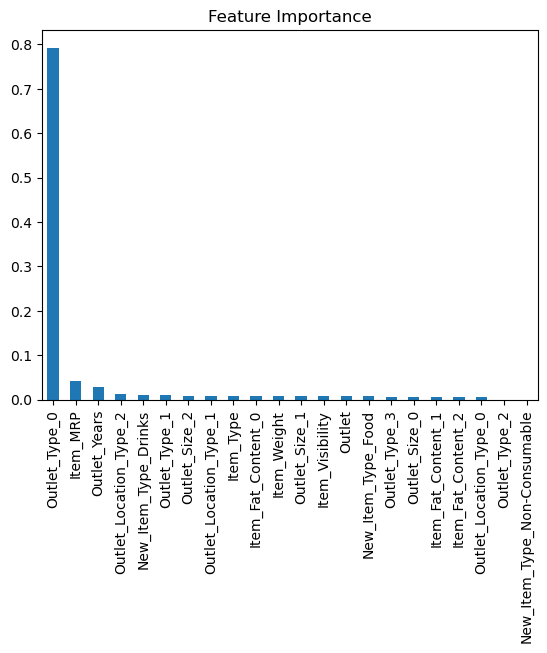

In [47]:
from xgboost import XGBRegressor
model = XGBRegressor()
train(model, X,Y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

Train Test Split
(8523, 22) (8523,)
(5966, 22) (2557, 22) (5966,) (2557,)
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 779
[LightGBM] [Info] Number of data points in the train set: 5966, number of used features: 22
[LightGBM] [Info] Start training from score 2167.477974
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 786
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 22
[LightGBM] [Info] Start training from score 2172.545146
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000484 seconds.
You can 

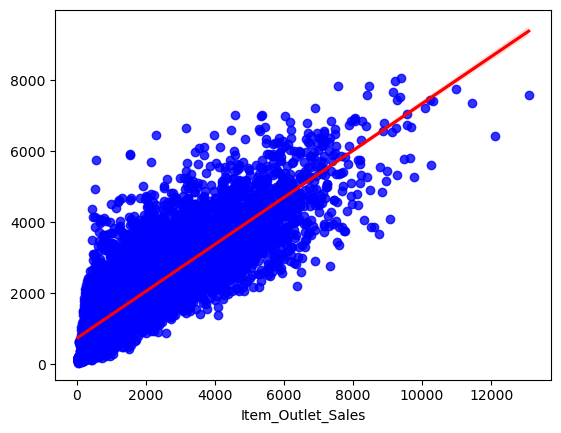

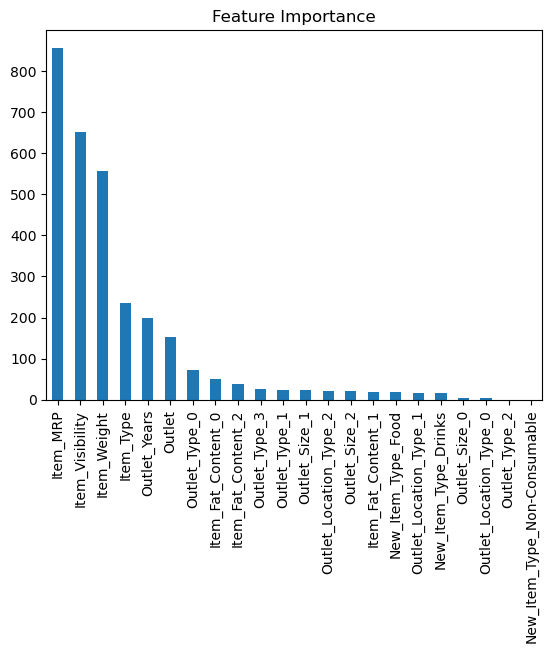

In [48]:
from lightgbm import LGBMRegressor
model = LGBMRegressor()
train(model, X,Y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] min_gain_to_split is set=0.09997491581800289, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.09997491581800289
[LightGBM] [Warning] min_gain_to_split is set=0.09997491581800289, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.09997491581800289
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001452 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 8523, number of used features: 22
[LightGBM] [Info] Start training from score 2181.288915
Best Parameters: {'learning_rate': 0.0412037280884873, 'max_depth': 7, 'min_gain_to_split': 0.09997491581800289, 'n_estimators': 137, 'subsample': 0.8001125833417065}
Best Score (Training): -1205397.4983879728

Accuracy:
Accuracy of Test Data
[LightGBM] [Warning] min_gain_to_split is

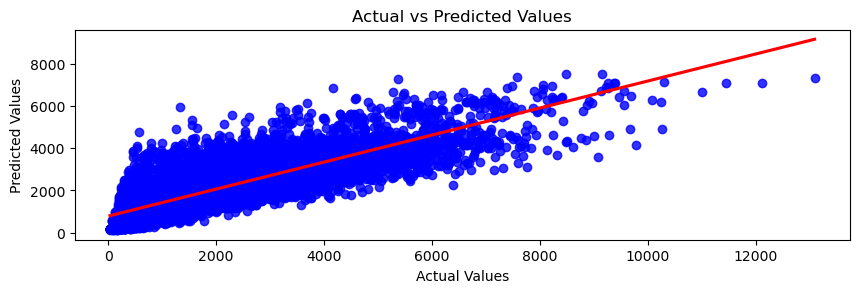

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

params = {"learning_rate": uniform(0.01, 0.2),
          "max_depth": [3, 5, 7, 10, None],
          "n_estimators": randint(50, 200),
          "subsample": uniform(0.7, 0.3),
          "min_gain_to_split": uniform(0.0, 1.0)}

lgb = LGBMRegressor()

random_search = RandomizedSearchCV( estimator=lgb,
                                    param_distributions=params,
                                    scoring='neg_mean_squared_error',
                                    n_iter=10,      
                                    cv=5,           
                                    verbose=2,
                                    random_state=42,
                                    n_jobs=-1)

random_search.fit(X, Y)

print("Best Parameters:", random_search.best_params_)
print("Best Score (Training):", random_search.best_score_)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print("\nAccuracy:")
print("Accuracy of Test Data")
Y_test_pred = random_search.predict(X_test)
print('R2 Score:', r2_score(Y_test, Y_test_pred))

print("Accuracy of Training Data")
Y_train_pred = random_search.predict(X_train)
print('R2 Score:', r2_score(Y_train, Y_train_pred))

print("Accuracy of Complete Data")
Y_pred = random_search.predict(X)
print('R2 Score:', r2_score(Y, Y_pred))
print()
plt.figure(figsize=(10, 6))
plt.subplot(212)
print('Display Actual and Predicted Values')
sns.regplot(x=Y, y=Y_pred, scatter_kws={"color": "b"}, line_kws={"color": "r"}, ci=None)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [50]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(random_search, file)